### Potential Analysis with Multiple Parameters

This notebook applies potential analysis to the OBB measures through:

* Fit a quartic potential;
* Extraction the constants;
* Making the plots showed in the *Results* section of the paper.

A brief summary of the organization of this notebook:

### Summary

- [1 - Packages and imports](#1)

- [2 - Load data and define constants](#2)

- [3 - Potential analysis](#3)

<a name='1'></a> 
### 1. Packages and imports

In [5]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.optimize import curve_fit
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2
plt.rcParams.update({'font.size': 15})

<a name='2'></a> 
### 2. Load data and define constants

The data loaded will be `.csv` file from the one hour video and from the simulations for the OBB that was executed considering the $NA$ of $0.46$, the best value encountered according to the Kullback-Leibler method. The simulation will be loaded and then translated to have zero mean, a variable $r$ will be created considering the values of $x$ and $y$.

In [6]:
kb = 1.380649*(10**-23)
T = 300

In [13]:
measures = pd.read_csv('../data/dataframes/filtered.csv')
conv = (0.5*1.15*10**-6)/np.median(measures['radius'].values)
measures['x'] = measures['x'].values - measures['x'].values.mean()
measures['y'] = measures['y'].values - measures['y'].values.mean()
measures['z'] = measures['z'].values - measures['z'].values.mean()
measures['x-um'] = conv*measures['x']
measures['y-um'] = conv*measures['y']
measures['r'] = conv*np.sqrt(np.power(measures['x-um'].values,2)+np.power(measures['y-um'].values,2))

#rmse_z = np.sqrt(np.power(z,2).mean())
#rmse_measure_z = np.sqrt(np.power(measures['z'].values, 2).mean())
#measures['z-scaled'] = conv_z*measures['z']
#conv_z = rmse_z/rmse_measure_z

In [14]:
measures.head()
conv

4.132655701518845e-08

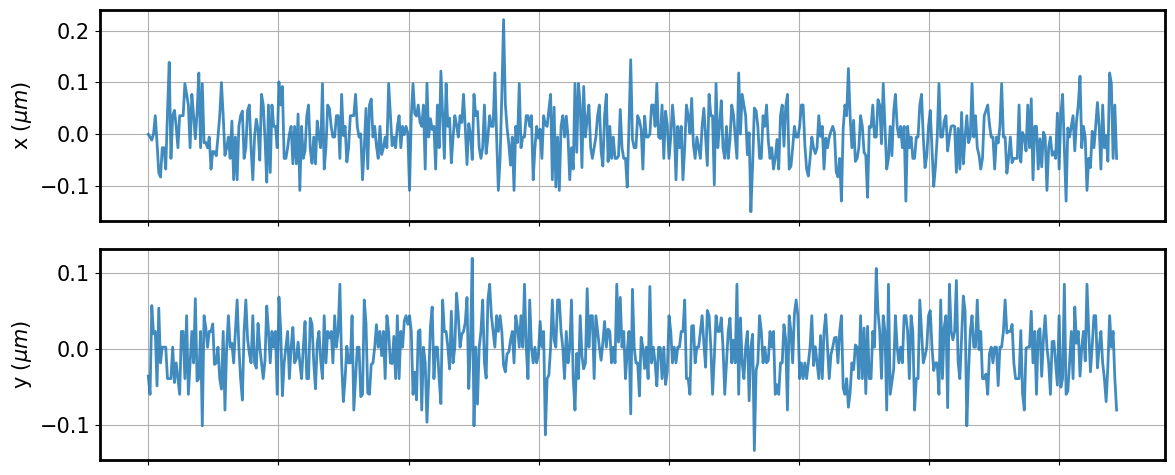

In [16]:
fig, axs = plt.subplots(2,1)
fig.set_figwidth(12)
fig.set_figheight(5)
#ax1 = plt.subplot(211)
#ax1.set_ylim([-0.08, 0.08])
axs[0].set_ylabel(r'x $(\mu m)$')
axs[0].plot(1/15*np.linspace(0, len(measures['y-um'].values)+1, len(measures['y-um'].values)), 10**6*measures['x-um'].values, linewidth=2, alpha=0.85)
axs[0].tick_params('x', labelbottom=False)
axs[0].grid()

axs[1] = plt.subplot(212, sharex=axs[0])
#ax2.set_ylim([-0.08,0.08])
axs[1].set_ylabel(r'y $(\mu m)$')
axs[1].plot(1/15*np.linspace(0, len(measures['y-um'].values)+1, len(measures['y-um'].values)), 10**6*measures['y-um'].values, linewidth=2, alpha=0.85)
axs[1].tick_params('x', labelbottom=False)
axs[1].ticklabel_format(style='sci')
axs[1].grid()
plt.show()

<a name='3'></a> 
### 3. Potential analysis

With the traces loaded is possible to find the distributions and as consequence coefficientes $k_\rho$, $k_z$ and $k_{z,\rho}$ of the potential. The `prob_distr` defines the function to be fitted.

In [21]:
def prob_distr(data, C, k):
    beta = 1/(2*kb*T)
    U = k*np.power(data,2)
    return C*np.exp(-beta*U)

In [22]:
1/(2*kb*T)*np.power(measures['x-um'].values[0],2)

75.69442770279655

In the next cell we are going to check the ratio between the root mean squared values of the $x$, $y$ and $r$ coordinates, showing the similarities between coordinates values.

Now, is possible to create a 3d distribution using the `create_3d_data` function, the counts returned by this function is the function value for the `curve_fit`, and `rs` and `zs` are the coordinates. In the next image the fit (left) and the distribution (right) are shown.

[1.23527636e+02 1.87357811e-06]


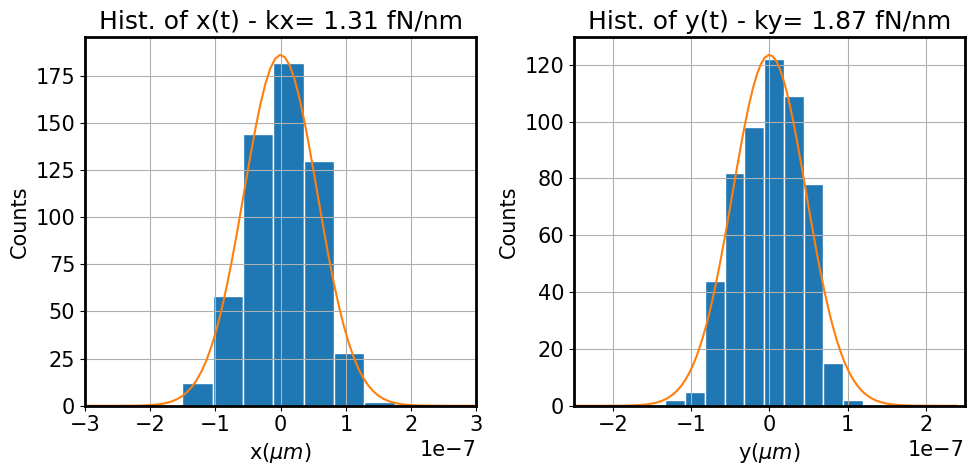

In [137]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(5)
#ax1 = plt.subplot(211)
#ax1.set_ylim([-0.08, 0.08])
counts_x, bins_x = np.histogram(measures['x-um'].values, bins=8)
bins_x = bins_x[:-1] + 0.5*(np.diff(bins_x))
params, _ = curve_fit(prob_distr, bins_x, counts_x, bounds=[(150, 0),(300, 1e-4)])
x_fit = np.linspace(2*measures['x-um'].values.min(), 2*measures['x-um'].values.max(), 100)
axs[0].hist(measures['x-um'].values, bins=8, density=False, edgecolor='white')
axs[0].plot(x_fit, 
         prob_distr(x_fit, *params))
axs[0].set_xlabel(r'x($\mu m$)')
axs[0].set_ylabel('Counts')
axs[0].set_title(f'Hist. of x(t) - kx= {np.round(params[1]*10**15*10**-9,2)} fN/nm')
axs[0].set_xlim(-3e-7, 3e-7)
#plt.ylim(0, 8e6)
axs[0].grid(True)


counts_y, bins_y = np.histogram(measures['y-um'].values, bins=10)
bins_y = bins_y[:-1] + 0.5*(np.diff(bins_y))
params, _ = curve_fit(prob_distr, bins_y, counts_y, bounds=[(100, 0),(300, 1e-4)])
print(params)
x_fit = np.linspace(2*measures['y-um'].values.min(), 2*measures['y-um'].values.max(), 100)
axs[1].hist(measures['y-um'].values, bins=10, density=False, edgecolor='white')
axs[1].plot(x_fit, 
         prob_distr(x_fit, *params))
axs[1].set_xlabel(r'y($\mu m$)')
axs[1].set_ylabel('Counts')
axs[1].set_title(f'Hist. of y(t) - ky= {np.round(params[1]*10**15*10**-9,2)} fN/nm')
axs[1].set_xlim(-2.5e-7, 2.5e-7)
#plt.ylim(0, 8e6)
axs[1].grid(True)


plt.show()



[1.23527636e+02 1.87357811e-06]


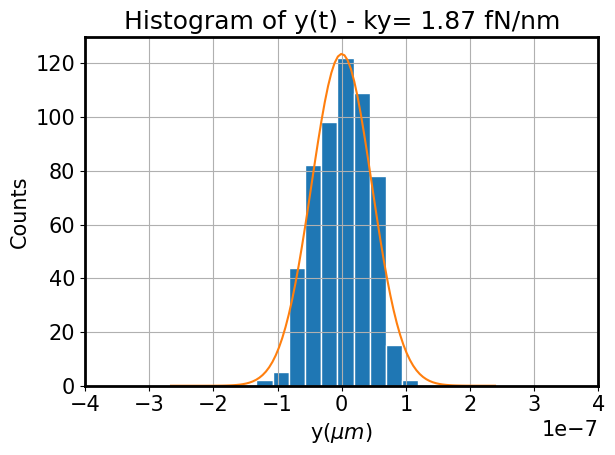

In [122]:
counts_y, bins_y = np.histogram(measures['y-um'].values, bins=10)
bins_y = bins_y[:-1] + 0.5*(np.diff(bins_y))
params, _ = curve_fit(prob_distr, bins_y, counts_y, bounds=[(100, 0),(300, 1e-4)])
print(params)
x_fit = np.linspace(2*measures['y-um'].values.min(), 2*measures['y-um'].values.max(), 100)
plt.hist(measures['y-um'].values, bins=10, density=False, edgecolor='white')
plt.plot(x_fit, 
         prob_distr(x_fit, *params))
plt.xlabel(r'y($\mu m$)')
plt.ylabel('Counts')
plt.title(f'Histogram of y(t) - ky= {np.round(params[1]*10**15*10**-9,2)} fN/nm')
plt.xlim(-4e-7, 4e-7)
#plt.ylim(0, 8e6)
plt.grid(True)
plt.show()

In [335]:
hist, xedges, yedges = np.histogram2d(measures['r'].values, measures['z-scaled'].values, bins=30, range=[[0, 1.6e-7], [-3e-7, 3e-7]])
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
Z1 = prob_distr((xpos, ypos), params[0], params[1], params[2], params[3])

In [336]:
filt_hist = hist[0:-10,4:-4].flatten()/hist.flatten().max()
filt_z1 = Z1[0:-10,4:-4].flatten()/hist.flatten().max()
np.abs(filt_hist-filt_z1).mean()

0.0542516781291267

In [337]:
np.sqrt(np.power(counts/counts.max() - prob_distr((rs, zs), *params)/counts.max(), 2).mean())

0.05167267521375948

In [338]:
np.abs(counts/counts.max() - prob_distr((rs, zs), *params)/counts.max()).mean()

0.0182710336252828

With the errors being small enough, we can use the coefficients returned by the fit to reconstruct the potential.

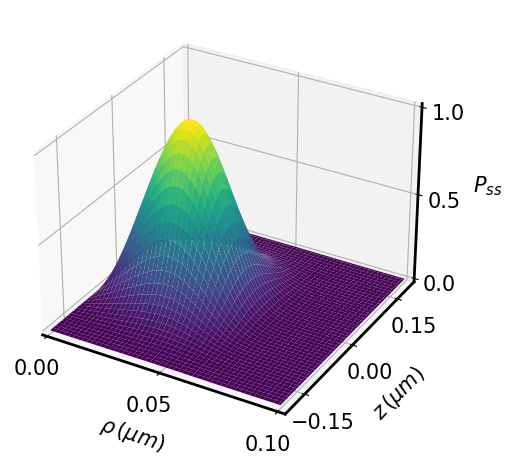

In [339]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_figwidth(5)
fig.set_figheight(5)
ax = fig.add_subplot(1, 1, 1, projection='3d')
X1, Y1 = np.meshgrid(np.linspace(0, 1.0e-7, 100), np.linspace(-2e-7, 2e-7, 100))
Z1 = prob_distr((X1, Y1), params[0], params[1], params[2], params[3])
ax.plot_surface(10**6*X1, 10**6*Y1, Z1/Z1.max(), alpha=1.0, cmap=matplotlib.cm.viridis)
ax.set_ylim([-0.2, 0.2])
ax.set_xlim([0, 0.101])
ax.set_zlim([0, 1])
ax.set_xlabel(r'$\rho\,(\mu m)$')
ax.set_ylabel(r'$z\,(\mu m)$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$P_{ss}$')
ax.set_xticks(np.arange(0, 0.11, 0.05))
ax.set_yticks(np.arange(-0.15, 0.16, 0.15))
ax.set_zticks(np.arange(0.0, 1.2, 0.5))
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
plt.savefig('../data/plots/potential_analysis_3d.pdf', dpi=300, bbox_inches = 'tight')
plt.show()

In [340]:
def U(rho, z, k1, k2, k3):
    return k1*np.power(rho, 4) - k2*np.power(rho, 2)*np.power(z,2) + k3*np.power(z,2)

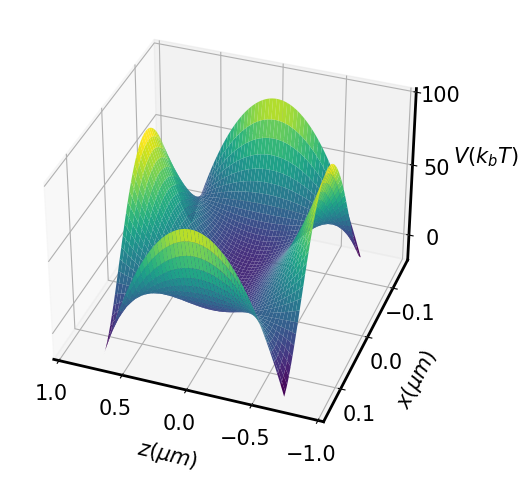

In [341]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_figwidth(5)
fig.set_figheight(5)
k1, k2, k3 = params[1], params[2], params[3]
ax = fig.add_subplot(1, 1, 1, projection='3d')
X1, Y1 = np.meshgrid(np.linspace(-1.4e-7, 1.4e-7,200), np.linspace(-7e-7, 7e-7, 200))
ax.view_init(35, 110)
Z1 = prob_distr((X1, Y1), params[0], params[1], params[2], params[3])
ax.plot_surface(10**6*Y1, 10**6*X1, U(X1, Y1, k1, k2, k3)/(kb*T), alpha=1.0, cmap=matplotlib.cm.viridis, edgecolor='none')
ax.set_xlabel(r'$z(\mu m)$')
ax.set_ylabel(r'$x(\mu m)$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$V(k_b T)$', rotation=0)
ax.set_xticks(np.arange(-1, 1.01, 0.5))
ax.set_yticks(np.arange(-0.10, 0.11, 0.1))
ax.set_zticks(np.arange(0, 100.1, 50))
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 15
plt.savefig('../data/plots/potential_3d.pdf', dpi=300, bbox_inches = 'tight')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

/tmp/ipykernel_28774/2899667966.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(10**7*Z, 10**6*X, U(X, Z, k1, k2, k3)/(kb*T), cmap=matplotlib.cm.viridis, vmin=0, vmax=100)


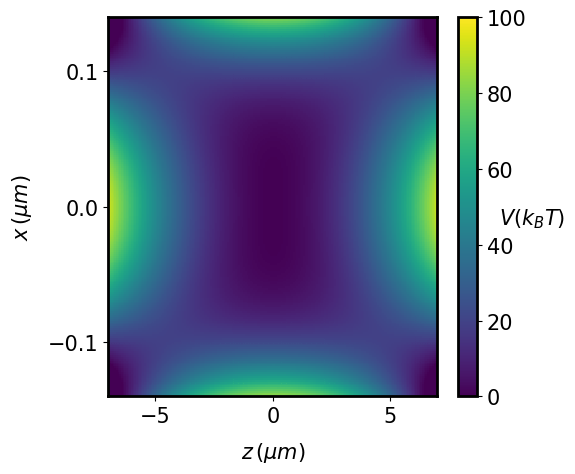

In [342]:
fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(5)
X, Z = np.meshgrid(np.linspace(-1.4e-7, 1.4e-7,200), np.linspace(-7e-7, 7e-7, 200))
p = ax.pcolor(10**7*Z, 10**6*X, U(X, Z, k1, k2, k3)/(kb*T), cmap=matplotlib.cm.viridis, vmin=0, vmax=100)
cb = fig.colorbar(p, ax=ax)
cb.set_label(r'$V(k_B T)$', rotation=0)
ax.set_ylabel(r'$x\,(\mu m)$')
ax.set_xlabel(r'$z\,(\mu m)$')
ax.set_yticks(np.arange(-0.1, 0.11, 0.1))
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
plt.savefig('../data/plots/potential_colormap.png', dpi=300)
plt.show()